# Deteksi Berita Hoax

### Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import re
import string
from sklearn import preprocessing

### Masukan Data Hoax dan Fakta

In [ ]:
#baca drive kita
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Data Berita Hoax/berita.xlsx")

In [ ]:
#Cek head data hoax
df.head(10)

,berita,tagging
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid
3,Ikan lele merupakan salah satu makanan favorit...,Valid
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid
5,"""Dalam sesuap daging ikan lele, terkandung 3.0...",Hoax
6,Bahaya Mengkonsumsi Ikan Lele Yang Mengandung ...,Hoax
7,"Di jejaring sosial, banyak beredar informasi y...",Hoax
8,"Jakarta, Sebuah artikel yang cukup viral di in...",Valid
9,Pada dasarnya tidak ada makanan yang membawa s...,Valid


In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub(r"\d+", "", text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('tersebut*', '', text)
    text = re.sub('tidak', '', text)
    return text

df["berita"] = df["berita"].apply(wordopt)
df.head(10)

,berita,tagging
0,jakarta di jejaring sosial banyak beredar in...,Valid
1,isu bahwa ikan lele mengandung sel kanker di j...,Valid
2,bagi penikmat kuliner dengan bahan dasar ikan ...,Valid
3,ikan lele merupakan salah satu makanan favorit...,Valid
4,ikan lele merupakan bahan makanan yang cukup p...,Valid
5,dalam sesuap daging ikan lele terkandung s...,Hoax
6,bahaya mengkonsumsi ikan lele yang mengandung ...,Hoax
7,di jejaring sosial banyak beredar informasi y...,Hoax
8,jakarta sebuah artikel yang cukup viral di in...,Valid
9,pada dasarnya ada makanan yang membawa sel ka...,Valid


In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.2 MB/s 


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
df["berita"] = df["berita"].apply(stopword.remove)
df.head(10)

,berita,tagging
0,jakarta jejaring sosial banyak beredar infor...,Valid
1,isu ikan lele mengandung sel kanker jejaring s...,Valid
2,penikmat kuliner bahan dasar ikan lele berita...,Valid
3,ikan lele merupakan salah satu makanan favorit...,Valid
4,ikan lele merupakan bahan makanan cukup popule...,Valid
5,sesuap daging ikan lele terkandung sel kan...,Hoax
6,bahaya mengkonsumsi ikan lele mengandung sel k...,Hoax
7,jejaring sosial banyak beredar informasi meny...,Hoax
8,jakarta sebuah artikel cukup viral internet m...,Valid
9,dasarnya makanan membawa sel kanker pakar ka...,Valid


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
  text = text.lower()
  text = stemmer.stem(text)
  return text

In [ ]:
df["berita"] = df["berita"].apply(stemming)
df.head(10)

,berita,tagging
0,jakarta jejaring sosial banyak edar informasi ...,Valid
1,isu ikan lele kandung sel kanker jejaring soci...,Valid
2,nikmat kuliner bahan dasar ikan lele berita su...,Valid
3,ikan lele rupa salah satu makan favorit indone...,Valid
4,ikan lele rupa bahan makan cukup populer indon...,Valid
5,suap daging ikan lele kandung sel kanker judul...,Hoax
6,bahaya konsumsi ikan lele kandung sel kanker l...,Hoax
7,jejaring sosial banyak edar informasi sebut le...,Hoax
8,jakarta buah artikel cukup viral internet sebu...,Valid
9,dasar makan bawa sel kanker pakar kanker dunia...,Valid


In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub(r"\d+", "", text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('tersebut', '', text)
    
    return text

df["berita"] = df["berita"].apply(wordopt)
df.head(10)

,berita,tagging
0,jakarta jejaring sosial banyak beredar infor...,Valid
1,isu ikan lele mengandung sel kanker jejaring s...,Valid
2,penikmat kuliner bahan dasar ikan lele berita...,Valid
3,ikan lele merupakan salah satu makanan favorit...,Valid
4,ikan lele merupakan bahan makanan cukup popule...,Valid
5,sesuap daging ikan lele terkandung sel kan...,Hoax
6,bahaya mengkonsumsi ikan lele mengandung sel k...,Hoax
7,jejaring sosial banyak beredar informasi meny...,Hoax
8,jakarta sebuah artikel cukup viral internet m...,Valid
9,dasarnya makanan membawa sel kanker pakar kan...,Valid


In [ ]:
def filtering(text):
  text = text.split()
  return text

In [ ]:
df["berita"] = df["berita"].apply(filtering)
df.head(10)

,berita,tagging
0,"[jakarta, jejaring, sosial, banyak, edar, info...",0
1,"[isu, ikan, lele, kandung, sel, kanker, jejari...",0
2,"[nikmat, kuliner, bahan, dasar, ikan, lele, be...",0
3,"[ikan, lele, rupa, salah, satu, makan, favorit...",0
4,"[ikan, lele, rupa, bahan, makan, cukup, popule...",0
5,"[suap, daging, ikan, lele, kandung, sel, kanke...",1
6,"[bahaya, konsumsi, ikan, lele, kandung, sel, k...",1
7,"[jejaring, sosial, banyak, edar, informasi, se...",1
8,"[jakarta, buah, artikel, cukup, viral, interne...",0
9,"[dasar, ada, makan, bawa, sel, kanker, pakar, ...",0


In [ ]:
#cek head data fakta
df.columns

Index(['berita', 'tagging'], dtype='object')

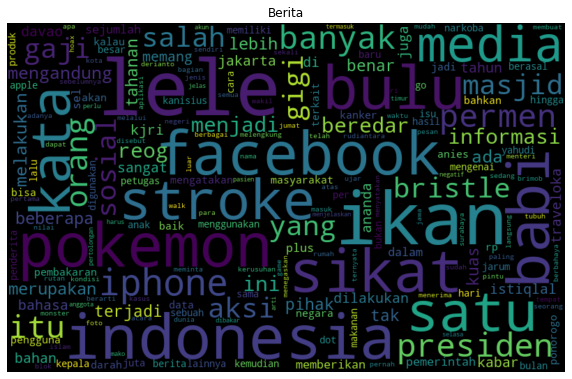

In [ ]:
#cek kata yang sering muncul di berita hoaks
from wordcloud import WordCloud
all_word = ' '.join(df["berita"])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(all_word)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title("Berita")
plt.show()

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('di ', ' ', text)    
    text = re.sub(' yang', ' ', text) 
    text = re.sub(' dan', ' ', text) 
    text = re.sub(' tidak', ' ', text) 
    text = re.sub(' adalah', ' ', text) 
    text = re.sub(' itu', ' ', text) 
    text = re.sub(' juga', ' ', text) 
    text = re.sub(' kita', ' ', text) 
    text = re.sub(' ada', ' ', text) 
    text = re.sub(' dalam', ' ', text) 
    text = re.sub(' atau', ' ', text)
    text = re.sub(' pada', ' ', text)  
    text = re.sub(' para', ' ', text) 
    text = re.sub(' tersebut', ' ', text) 
    text = re.sub(' oleh', ' ', text) 
    text = re.sub(' untuk', ' ', text) 
    text = re.sub(' dari', ' ', text) 
    text = re.sub(' akan', ' ', text) 
    text = re.sub(' dengan', ' ', text) 
    text = re.sub(' sudah', ' ', text) 
    text = re.sub(' ini', ' ', text) 
    text = re.sub(' bahwa', ' ', text) 
    text = re.sub(' jika', ' ', text) 
    text = re.sub(' karena', ' ', text) 
    text = re.sub(' bisa', ' ', text) 
    text = re.sub(' telah', ' ', text) 
    text = re.sub(' hal', ' ', text) 
    text = re.sub(' seperti', ' ', text)
    text = re.sub(' ke', ' ', text) 
    text = re.sub(' sebagai', ' ', text) 
    return text

In [ ]:
df["berita"] = df["berita"].apply(wordopt)
df.head(10)

,berita,tagging
0,jakarta jejaring sosial banyak edar informasi ...,Valid
1,isu ikan lele kandung sel kanker jejaring soci...,Valid
2,nikmat kuliner bahan dasar ikan lele berita su...,Valid
3,ikan lele rupa salah satu makan favorit indone...,Valid
4,ikan lele rupa bahan makan cukup populer indon...,Valid
5,suap daging ikan lele kandung sel kanker jud...,Hoax
6,bahaya konsumsi ikan lele kandung sel kanker ...,Hoax
7,jejaring sosial banyak edar informasi sebut le...,Hoax
8,jakarta buah artikel cukup viral internet sebu...,Valid
9,dasar ada makan bawa sel kanker pakar kanker d...,Valid


In [ ]:
bool_series = df.duplicated(subset='berita')

print('Boolean series:')
print(bool_series)
print('\n')
print('DataFrame after removing duplicates found in the Name column:')
df[~bool_series]

Boolean series:
0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool


DataFrame after removing duplicates found in the Name column:


,berita,tagging
0,jakarta jejaring sosial banyak edar informasi ...,Valid
1,isu ikan lele kandung sel kanker jejaring soci...,Valid
2,nikmat kuliner bahan dasar ikan lele berita su...,Valid
3,ikan lele rupa salah satu makan favorit indone...,Valid
4,ikan lele rupa bahan makan cukup populer indon...,Valid
...,...,...
595,kabar edar putar rencana naik gaji presiden wa...,Valid
596,kabar edar putar rencana naik gaji presiden wa...,Valid
597,akhir edar berita nyata naik gaji presiden wak...,Valid
598,rancang atur perintah rpp gaji tunjang pegawai...,Valid


In [ ]:
df['tagging'].replace(['Valid', 'Hoax'],[0, 1], inplace=True)
df.head(10)

,berita,tagging
0,jakarta jejaring sosial banyak beredar infor...,0
1,isu ikan lele mengandung sel kanker jejaring s...,0
2,penikmat kuliner bahan dasar ikan lele berita...,0
3,ikan lele merupakan salah satu makanan favorit...,0
4,ikan lele merupakan bahan makanan cukup popule...,0
5,sesuap daging ikan lele terkandung sel kan...,1
6,bahaya mengkonsumsi ikan lele mengandung sel k...,1
7,jejaring sosial banyak beredar informasi meny...,1
8,jakarta sebuah artikel cukup viral internet m...,0
9,dasarnya makanan membawa sel kanker pakar ka...,0


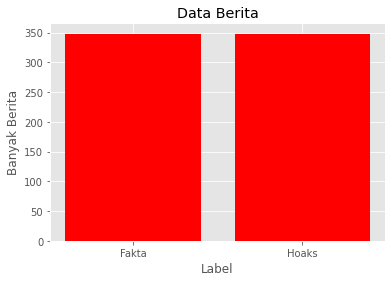

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import style

style.use('ggplot')

x = [0, 1]
y = [348, 348]

fig, ax = plt.subplots()

ax.bar(x, y, align='center', color = 'red')

ax.set_title('Data Berita')
ax.set_ylabel('Banyak Berita')
ax.set_xlabel('Label')

ax.set_xticks(x)
ax.set_xticklabels(("Fakta", "Hoaks"))

plt.show()

In [ ]:
df_hoax = df[df["tagging"] == 1]
df_hoax

,berita,tagging
5,sesuap daging ikan lele terkandung sel kan...,1
6,bahaya mengkonsumsi ikan lele mengandung sel k...,1
7,jejaring sosial banyak beredar informasi meny...,1
12,ikan lele disebut sebut mengandung sel kanke...,1
14,benarkah sesuap daging ikan lele memicu sel k...,1
...,...,...
571,gaji presiden ri naik drastis hingga mencapai ...,1
572,gaji presiden ri berpotensi mengalami kenaikan...,1
573,gaji presiden besarnya rp juta per bulan dian...,1
574,pemerintah tengah melakukan pembahasan mengena...,1


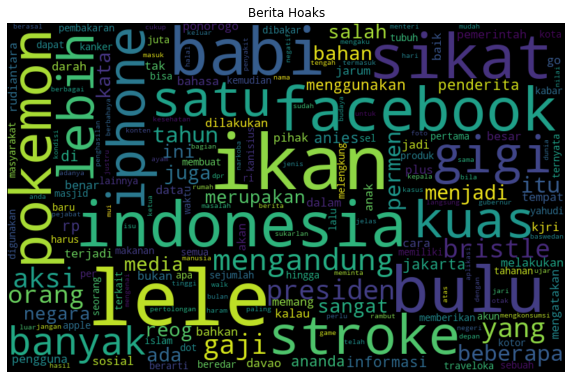

In [ ]:
from wordcloud import WordCloud
all_word = ' '.join(df_hoax["berita"])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(all_word)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title("Berita Hoaks")
plt.show()

#### Defining variabel x dan y

In [ ]:
x = df["berita"]
y = df["tagging"]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xt = vectorization.fit_transform(x)
xt.toarray()[5:15,100:110]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.05232949],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08168266],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.10643584, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [ ]:
#normalisasi data
xt1 = preprocessing.normalize(xt.toarray())
xt1[5:15,100:110]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.05232949],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08168266],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.10643584, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [ ]:
vocabulary = vectorization.vocabulary_
print(vocabulary)

{'jakarta': 3489, 'jejaring': 3553, 'sosial': 8813, 'banyak': 559, 'beredar': 783, 'informasi': 3312, 'menyebut': 5988, 'lele': 4678, 'ikan': 3232, 'paling': 6663, 'jorok': 3612, 'sesuap': 8584, 'daging': 1527, 'terkandung': 9336, 'sel': 8404, 'kanker': 3747, 'benarkah': 675, 'julukan': 3631, 'merujuk': 6125, 'sifat': 8671, 'doyan': 2482, 'mengonsumsi': 5779, 'segala': 8333, 'jenis': 3575, 'limbah': 4736, 'perairan': 7254, 'bahkan': 495, 'sebuah': 8304, 'artikel': 370, 'cukup': 1507, 'viral': 9896, 'internet': 3371, 'menyebutkan': 5989, 'kotoran': 4466, 'manusia': 4934, 'dijadikan': 1908, 'pakan': 6652, 'budidaya': 1258, 'kota': 4460, 'haikou': 2986, 'china': 1414, 'itu': 3452, 'habitat': 2973, 'aslinya': 402, 'catfish': 1356, 'dikenal': 1953, 'spesies': 8829, 'sangat': 8178, 'tangguh': 9098, 'dilengkapi': 2011, 'alat': 149, 'pernapasan': 7383, 'tambahan': 9067, 'berupa': 1066, 'labirin': 4553, 'mampu': 4898, 'bertahan': 1020, 'hidup': 3116, 'kondisi': 4393, 'berlumpur': 918, 'tercemar

In [ ]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(1)

# implementing oversampling to training data
x_sm, y_sm = smote.fit_resample(xt1, y)

# target class count of resampled dataset
y_sm.value_counts()

/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


0    348
1    348
Name: tagging, dtype: int64

#### Split dataset jadi train dan tes

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size=0.2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2)

##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
pred_rfc = RFC.predict(x_test)
pred_rfc

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [ ]:
RFC.score(x_test, y_test)

0.8785714285714286

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        79
           1       0.87      0.85      0.86        61

    accuracy                           0.88       140
   macro avg       0.88      0.88      0.88       140
weighted avg       0.88      0.88      0.88       140



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
      
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, pred_rfc, labels=[1,0]))

[[63  6]
 [ 8 63]]


In [ ]:
cnf_matrix = confusion_matrix(y_test, pred_rfc, labels=[1,0])
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Hoax = 1', 'Fakta = 0'],normalize = False, title='Confusion matrix')

NameError: ignored

# Model Testing With Manual Entry

### News

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fakta"
    elif n == 1:
        return "Hoaks"
    
def manual_testing(news):
    testing_news = {"berita":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_x_test = new_def_test["berita"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\nRFC Prediction: {} ".format(output_lable(pred_RFC[0])))

## New Section

In [ ]:
news = str(input())
news = news.lower()
#news = stemmer.stem(news)
news = re.sub('\[.*?\]', '', news)
news = re.sub(r"\d+", "", news)
news = re.sub("\\W"," ",news) 
news = re.sub('https?://\S+|www\.\S+', '', news)
news = re.sub('<.*?>+', '', news)
news = re.sub('[%s]' % re.escape(string.punctuation), '', news)
news = re.sub('\n', '', news)
news = re.sub('\w*\d\w*', '', news)

print(news)
manual_testing(news)

dokter hewan dari lab balai uji standar karantina ikan  bkipm kementerian kelautan dan perikanan  drh m aji purbayu mengatakan bahwa bintik putih pada ikan lele tersebut bukan mengindikasikan ada cacing di dalamnya  melainkan parasit jenis protozoa  aji mengungkapkan  cysta parasit protozoa pada ikan lele tersebut berjenis ichtyophthirius multifilis atau dikenal sebagai parasit penyebab penyakit white spot pada ikan  parasit tersebut tidak bersifat zoonosis  tidak menular ke manusia  dan akan mati pada pemanasan atau pemasakan ikan hingga matang  jika menemukan ikan dengan kondisi seperti di atas  aji mengatakan  masih bisa dikonsumsi  dengan catatan  diolah atau dimasak dengan benar benar matang 

RFC Prediction: Fakta 
